In [1]:
import pickle
import qutip
import numpy as np
import matplotlib.pyplot as plt
import multi_stages as stages
from dimer_stages_myte import DimerStages

In [2]:
import dimer_no_click_config as config


trajectories = []
for sim in config.sim_list:
    f = open(f"data/dimer-myte-lmbd_1={sim.lmbd_1:.1f}-lmbd_2={sim.lmbd_2:.1f}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}-no_click={sim.force_no_click}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    trajectories.append(data[1][0])

KeyboardInterrupt: 

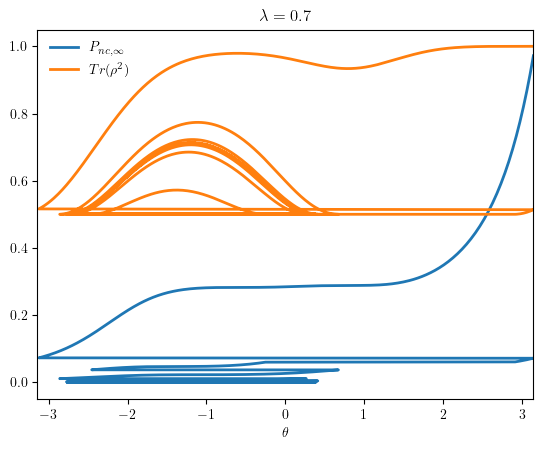

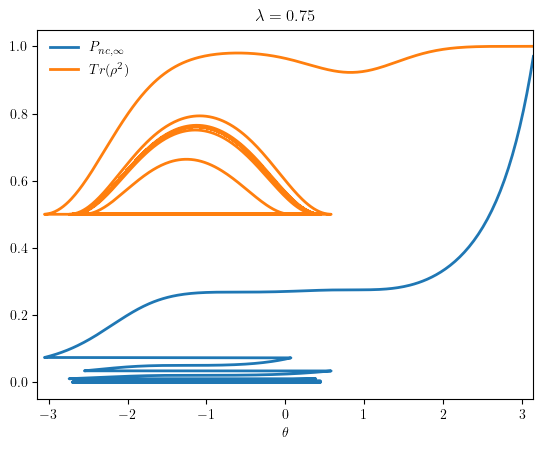

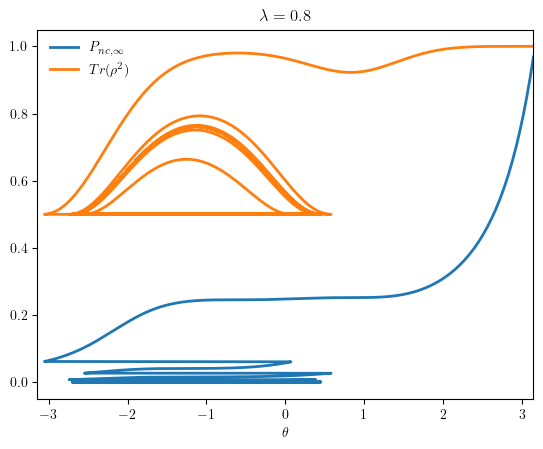

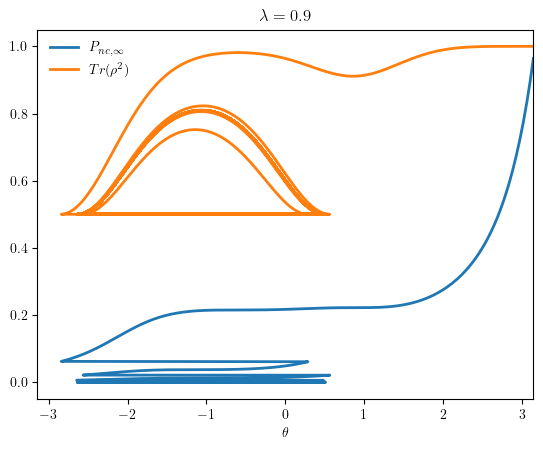

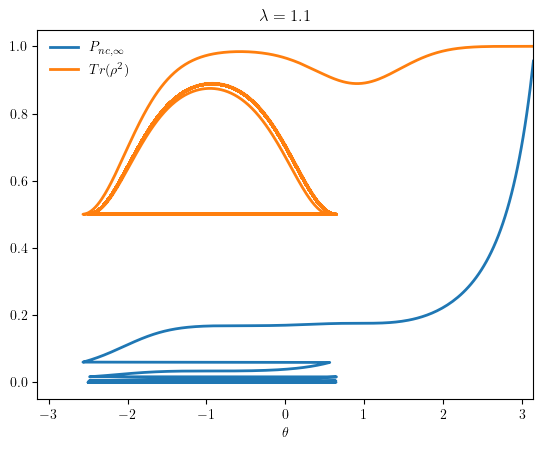

In [3]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for sim, traj in zip(config.sim_list, trajectories):
    t_all = np.arange(0, sim.T + 2*sim.dt, sim.dt)
    theta_t_all = np.empty_like(t_all)
    click_p_all = np.empty_like(t_all)
    purity_all = np.empty_like(t_all)
    dimer = DimerStages(sim.HS, sim.POVM, sim.dt)
    for i, state in enumerate(traj):
        pstate = state.ptrace(0)
        theta_t_all[i] = stages.state_to_theta(pstate)
        click_p_all[i] = dimer.compute_click_probs(state)[-1]
        purity_all[i] = pstate.purity()

    no_click_p_all = np.cumprod(np.ones_like(t_all) - click_p_all)

    plt.figure()

    # plt.plot(t_all, no_click_p_all)
    # plt.plot(t_all, purity_all)

    plt.plot(theta_t_all, no_click_p_all, label=r"$P_{nc,\infty}$")
    plt.plot(theta_t_all, purity_all, label=r"$Tr(\rho^2)$")

    plt.title(rf"$\lambda = {sim.lmbd_2}$")
    plt.legend()
    # plt.ylim( (0, 1) )
    plt.xlim( (-np.pi, np.pi) )
    plt.xlabel(r"$\theta$")

In [ ]:
theta_t_all

array([ 3.14159265,  3.12031927,  3.09768972, ..., -1.73631045,
       -1.74662861, -1.75694806])

In [ ]:
for i, theta in enumerate(theta_t_all[:-2]):
    if np.abs(theta - theta_t_all[i+1]) > 1:
        print(i)
        break

251


In [ ]:
trajectories[-1][251:253]

[Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.22817024+0.j       ]
  [0.        +0.6680477j]
  [0.        +0.6680477j]
  [0.23529319+0.j       ]],
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.24231045+0.j        ]
  [0.        +0.66555343j]
  [0.        +0.66555343j]
  [0.23529324+0.j        ]]]

In [ ]:
states_jump = trajectories[-1][251:253]

In [ ]:
pstates_jump = [state.ptrace(0) for state in states_jump]

In [ ]:
pstates_jump

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.49834939+0.j         0.        +0.00475847j]
  [0.        -0.00475847j 0.50165061+0.j        ]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.50167572+0.j         0.        -0.00467033j]
  [0.        +0.00467033j 0.49832428+0.j        ]]]

In [ ]:
thetas_jump = [stages.state_to_theta(pstate) for pstate in pstates_jump]

In [ ]:
thetas_jump

[-1.9046880456843367, 1.2263017798695939]

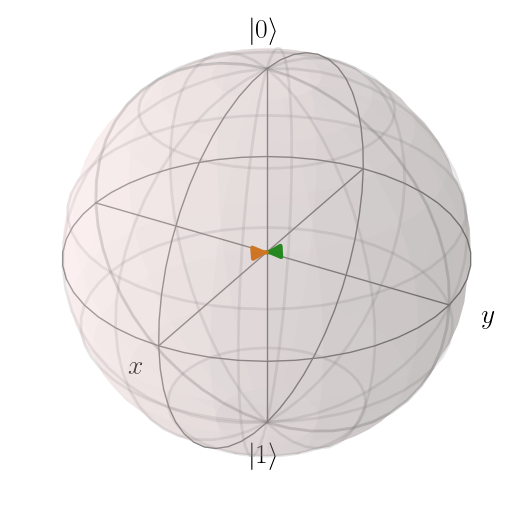

In [ ]:
b = qutip.Bloch()
b.add_states(pstates_jump)
b.render()
b

In [4]:
def state_to_polar(rho):
    y = 2 * rho[1, 0].imag
    z = (rho[0, 0] - rho[1, 1]).real
    r = np.sqrt(y**2 + z**2)
    theta = np.arctan2(y, z)

    return r, theta

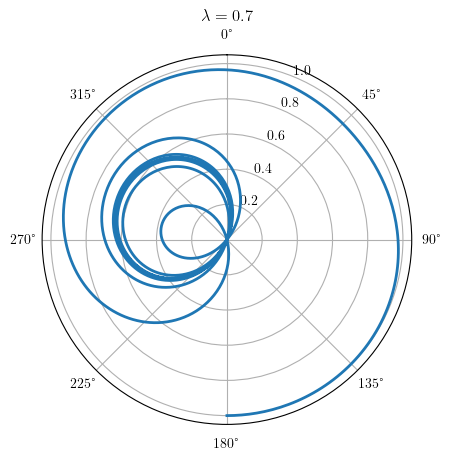

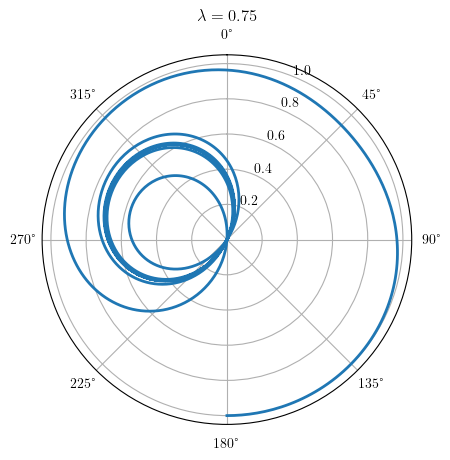

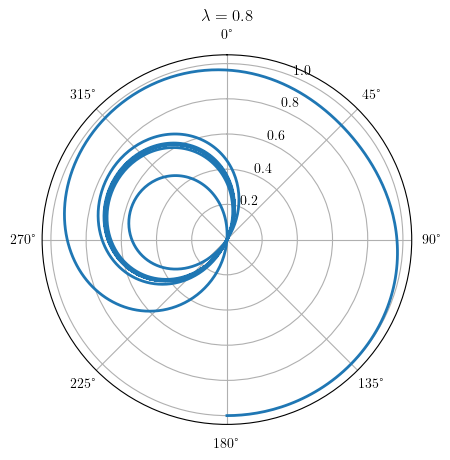

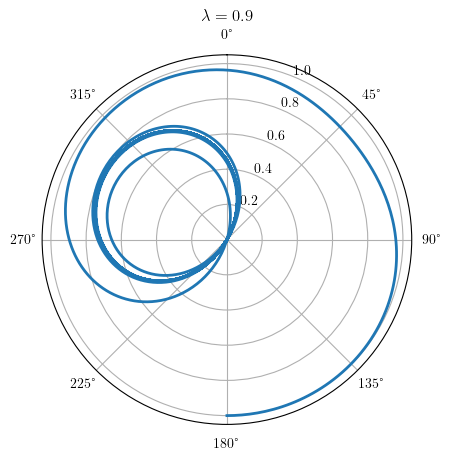

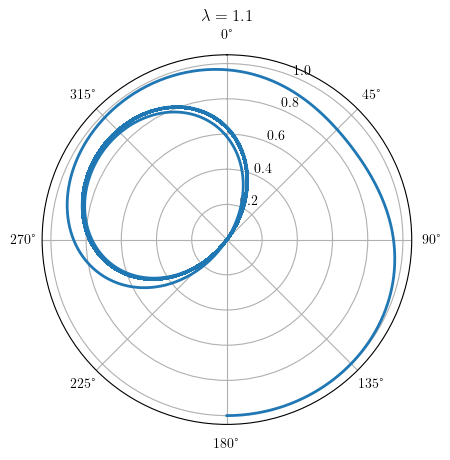

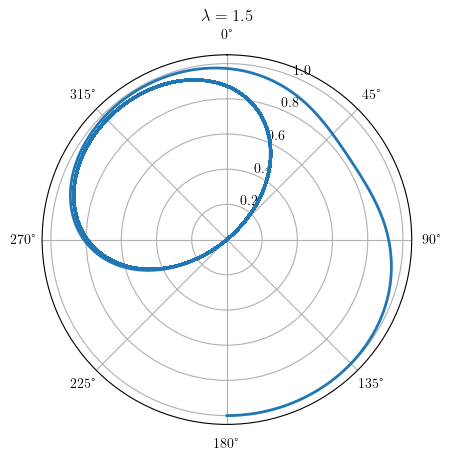

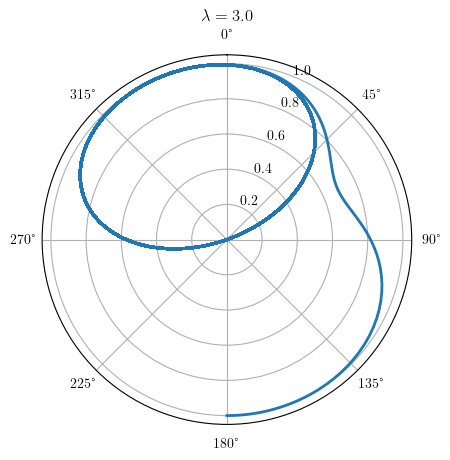

In [6]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for sim, traj in zip(config.sim_list, trajectories):
    t_all = np.arange(0, sim.T + 2*sim.dt, sim.dt)
    r_all = np.empty_like(t_all)
    theta_all = np.empty_like(t_all)
    for i, state in enumerate(traj):
        r_all[i], theta_all[i] = state_to_polar(state.ptrace(0))

    plt.figure()

    plt.polar(theta_all, r_all)

    plt.gca().set_theta_direction(-1)
    plt.gca().set_theta_zero_location('N')

    plt.title(rf"$\lambda = {sim.lmbd_2}$")

    plt.savefig(f"plots/20240430/no-click-trajectories-full-lmbd_2={sim.lmbd_2}.png")